In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import math
import glob
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate, ShuffleSplit, LearningCurveDisplay
from imblearn.under_sampling import RandomUnderSampler

plt.style.use('default')
%matplotlib inline

In [2]:
# Загрузка матрицы признаков
feature_matrix =  pd.read_csv('feature_matrix_128.csv', na_values=["?"])
total_matrix = feature_matrix.copy()

total_matrix = feature_matrix.drop(columns = ['Unnamed: 0','RF_WAMP',	'RF_MYOP'])
total_matrix.head()

,Ax_MAV,Ax_CD,Ax_MAX,Ax_MIN,Ax_INIT,Ax_FNL,Ay_MAV,Ay_CD,Ay_MAX,Ay_MIN,...,RF_VAR,RF_RMS,RF_IEMG,RF_MAV,RF_LOG,RF_WL,RF_ACC,RF_DASDV,RF_ZC,Mode
0,-0.082788,0.194516,0.098621,-0.553145,-0.548947,-0.006729,0.193257,0.105025,0.482086,0.086829,...,0.000008,0.002825,0.659565,0.002199,0.057953,0.369797,0.001233,0.001564,52.0,0.0
1,-0.147134,0.218421,0.104413,-0.572925,-0.035088,0.104413,0.229532,0.130144,0.504380,0.085965,...,0.000006,0.002418,0.584493,0.001948,0.056085,0.381330,0.001271,0.001618,64.0,0.0
2,-0.095318,0.186721,0.104413,-0.572925,0.038609,-0.461041,0.214915,0.111148,0.504380,0.085965,...,0.000005,0.002279,0.543723,0.001812,0.054427,0.403360,0.001345,0.001724,74.0,0.0
3,-0.072635,0.191764,0.104413,-0.585118,-0.343078,-0.001161,0.194778,0.117547,0.532462,0.081685,...,0.000006,0.002383,0.564877,0.001883,0.055629,0.378346,0.001261,0.001626,59.0,0.0
4,-0.164038,0.216013,0.100683,-0.585118,-0.002821,-0.013294,0.248497,0.134200,0.532462,0.075260,...,0.000005,0.002289,0.543924,0.001813,0.054203,0.387581,0.001292,0.001632,61.0,0.0


In [3]:
x_raw = total_matrix.copy()
y = x_raw['Mode']
x_raw = x_raw.copy().drop(columns=['Mode'])
rus = RandomUnderSampler()
x_raw, y = rus.fit_resample(x_raw, y)
print(x_raw[y==0].shape)
print(x_raw[y==1].shape)

(3585, 90)
(3585, 90)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(x_raw, y, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [5]:
normalizer1 = preprocessing.StandardScaler()
X_train = pd.DataFrame(normalizer1.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(normalizer1.fit_transform(X_test), columns=X_test.columns)
#X_val = pd.DataFrame(normalizer1.fit_transform(X_val), columns=X_val.columns)

In [6]:
clf_knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', n_jobs=5)

clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)
print("Accuracy is: ", np.mean(y_test == y_pred))
cm = confusion_matrix(y_test, y_pred)

Accuracy is:  0.8906156604901375


              precision    recall  f1-score   support

         0.0      0.902     0.932     0.917       731
         1.0      0.794     0.649     0.715       713
         2.0      0.869     0.936     0.901       707
         3.0      0.839     0.950     0.891       727
         4.0      0.964     0.960     0.962       702
         5.0      0.962     0.935     0.948       726
         6.0      0.854     0.826     0.840       713

    accuracy                          0.884      5019
   macro avg      0.883     0.884     0.882      5019
weighted avg      0.883     0.884     0.882      5019



[Text(0, 0.5, 'Сидение'),
 Text(0, 1.5, 'Ходьба по ровной поверхности'),
 Text(0, 2.5, 'Поднятие по рампе'),
 Text(0, 3.5, 'Спуск по рампе'),
 Text(0, 4.5, 'Поднятие по лестнице'),
 Text(0, 5.5, 'Спуск по лестнице'),
 Text(0, 6.5, 'Стояние')]

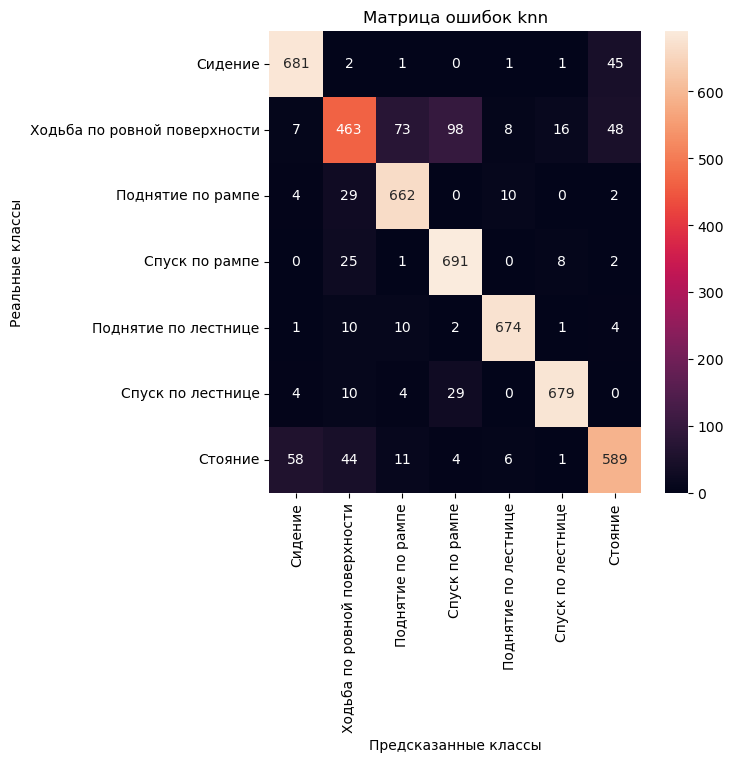

In [9]:
target_names = ['Sitting', 'Level ground walking', 'Ramp ascent', 'Ramp descent', 'Stair ascent', 'Stair descent', 'Standing']
print(classification_report(y_test, y_pred, digits = 3))
cm = confusion_matrix(y_test, y_pred)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
classes = ['Сидение', 'Ходьба по ровной поверхности', 'Подъ по рампе', 'Спуск по рампе', 'Поднятие по лестнице', 'Спуск по лестнице', 'Стояние']
fig, ax = plt.subplots(figsize=(6,6))  
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt="d")
# labels, title and ticks
ax.set_xlabel('Предсказанные классы')
ax.set_ylabel('Реальные классы') 
ax.set_title('Матрица ошибок knn') 
ax.xaxis.set_ticklabels(classes,rotation=90)
ax.yaxis.set_ticklabels(classes,rotation=0)

In [10]:
k = list(range(1, 101))
metric = list(['euclidean','minkowski','manhattan'])
param_grid = dict(n_neighbors=k, metric=metric)
grid = GridSearchCV(clf_knn, param_grid, cv=10, n_jobs=3, return_train_score=True)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'metric': 'minkowski', 'n_neighbors': 3}


In [18]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(10,5))
    fig.text(0.04, 0.5, 'Accuracy', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].plot(x, y_1, linestyle='--', label='test')
        ax[i].plot(x, y_2, linestyle='-',label='train' )
        ax[i].set_xlabel(p.upper())
        ax[i].set_xlabel("log")

    plt.legend()
    plt.show()

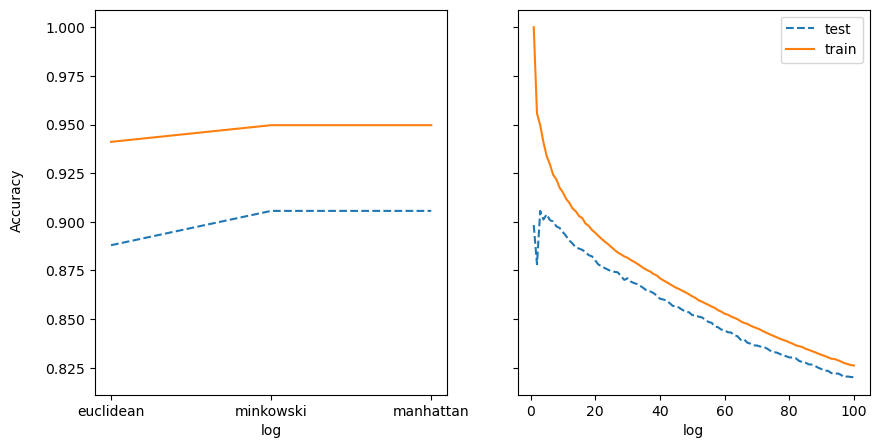

In [19]:
plot_search_results(grid)